# Signal Evaluation & Model Benchmarking

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [41]:
df = pd.read_csv("../data/processed/xmr_backtest_results.csv", parse_dates=["time"])
df.head()


,time,close,signal,next_close,position,strategy_return,cumulative_return,buy_and_hold,raw_return,strategy_return_capped,position_change,fee,strategy_return_net,cumulative_return_net
0,2023-06-14,133.98,1,134.56,1,0.004329,1.004329,1.000000,0.004329,0.004329,True,0.001,0.003329,1.003329
1,2023-06-15,134.56,0,134.66,1,0.000743,1.005075,1.004329,0.000743,0.000743,False,0.000,0.000743,1.004075
2,2023-06-16,134.66,0,136.38,1,0.012773,1.017913,1.005075,0.012773,0.012773,False,0.000,0.012773,1.016900
3,2023-06-17,136.38,0,137.23,1,0.006233,1.024257,1.017913,0.006233,0.006233,False,0.000,0.006233,1.023238
4,2023-06-18,137.23,0,138.28,1,0.007651,1.032094,1.024257,0.007651,0.007651,False,0.000,0.007651,1.031067


In [42]:
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess = returns - risk_free_rate
    return (excess.mean() / excess.std()) * np.sqrt(252)

def max_drawdown(series):
    cumulative = series.cummax()
    drawdown = series / cumulative - 1
    return drawdown.min()

total_return = (df["cumulative_return_net"].iloc[-1] - 1) * 100
sharpe = sharpe_ratio(df["strategy_return_net"].dropna())
drawdown = max_drawdown(df["cumulative_return_net"])

print(f"Total Return: {total_return:.2f}%")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {drawdown:.2%}")


Total Return: nan%
Sharpe Ratio: 0.60
Max Drawdown: -55.87%


In [43]:
df["position_change"] = df["signal"] != df["signal"].shift(1)
trade_returns = df.loc[df["position_change"], "strategy_return_net"]
win_rate = (trade_returns > 0).sum() / len(trade_returns)
avg_trade_return = trade_returns.mean()

print(f"Win Rate: {win_rate:.2%}")
print(f"Avg Trade Return: {avg_trade_return:.4f}")


Win Rate: 55.17%
Avg Trade Return: 0.0053


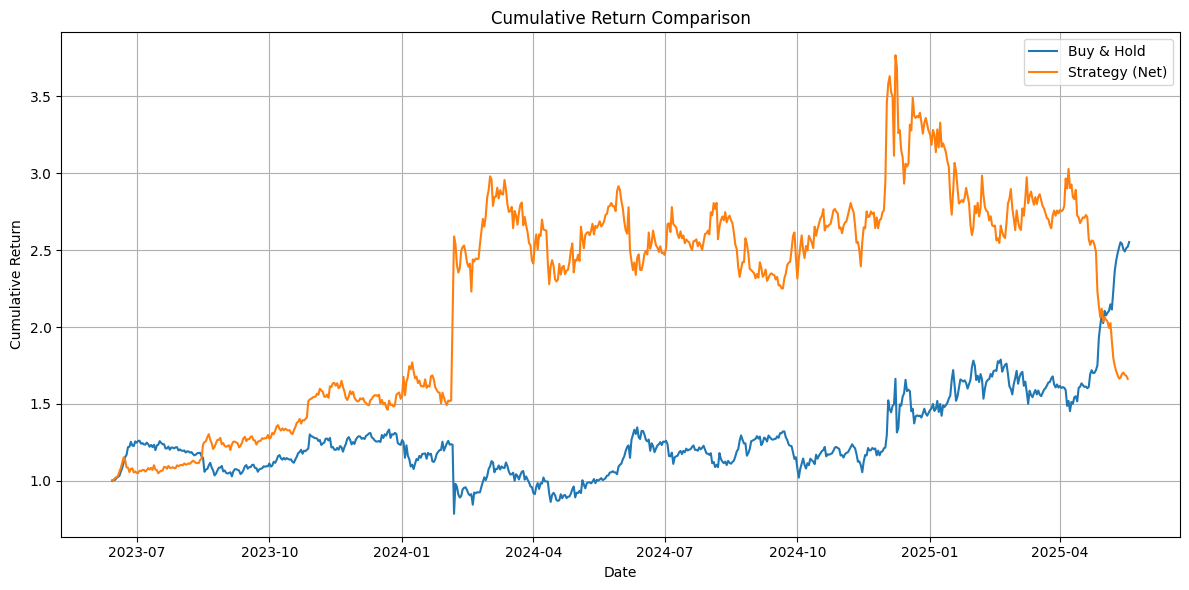

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["buy_and_hold"], label="Buy & Hold")
plt.plot(df["time"], df["cumulative_return_net"], label="Strategy (Net)")
plt.title("Cumulative Return Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


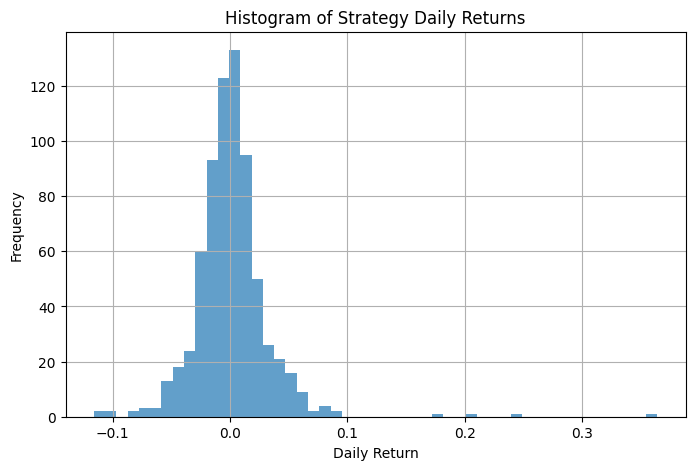

In [45]:
plt.figure(figsize=(8, 5))
plt.hist(df["strategy_return_net"].dropna(), bins=50, alpha=0.7)
plt.title("Histogram of Strategy Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


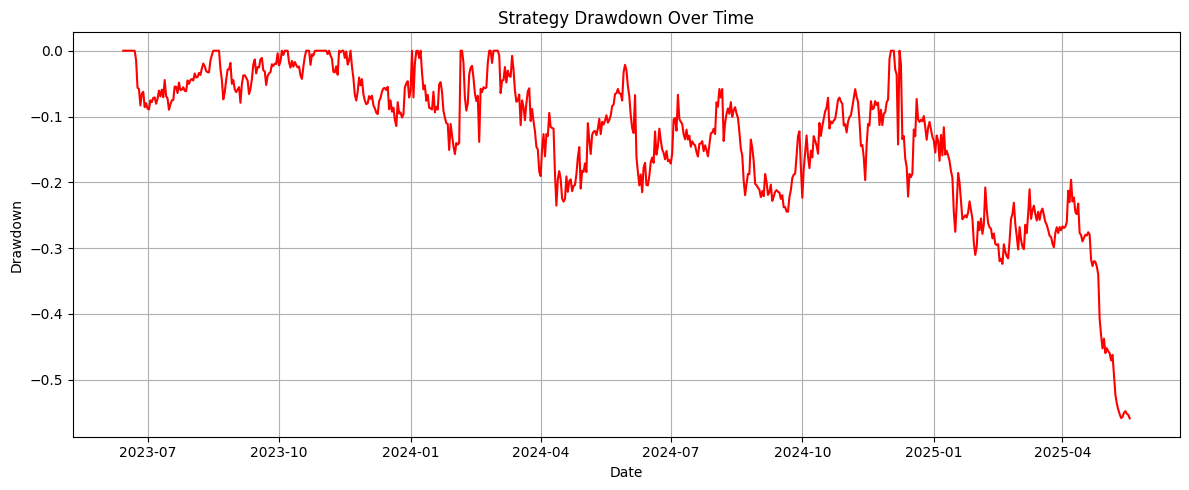

In [46]:
rolling_max = df["cumulative_return_net"].cummax()
drawdown = df["cumulative_return_net"] / rolling_max - 1

plt.figure(figsize=(12, 5))
plt.plot(df["time"], drawdown, label="Drawdown", color="red")
plt.title("Strategy Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.tight_layout()
plt.show()
